In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model

from functions.plot_web_img import plot_web_img
from functions.processing_img import processing_img

In [2]:
webcam_path = 'data/webcam'
drawing_path = 'data/drawing'

webcam_pics = os.listdir(webcam_path)
drawing_pics = os.listdir(drawing_path)

# Associate the name of the image with the image itself
webcam_pics = {pic: plt.imread(os.path.join(webcam_path, pic)) for pic in webcam_pics}
drawing_pics = {pic: plt.imread(os.path.join(drawing_path, pic)) for pic in drawing_pics}

# Save keys (without '.png' and '_') of the dictionary in a list named actual_digits
webcam_actual_digits = [pic.split('.')[0].split('_')[0] for pic in webcam_pics.keys()]
drawing_actual_digits = [pic.split('.')[0].split('_')[0] for pic in drawing_pics.keys()]

print(drawing_actual_digits, drawing_actual_digits)

['0', '0', '1', '1', '2', '2', '3', '3', '3', '4', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9', '9'] ['0', '0', '1', '1', '2', '2', '3', '3', '3', '4', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9', '9']


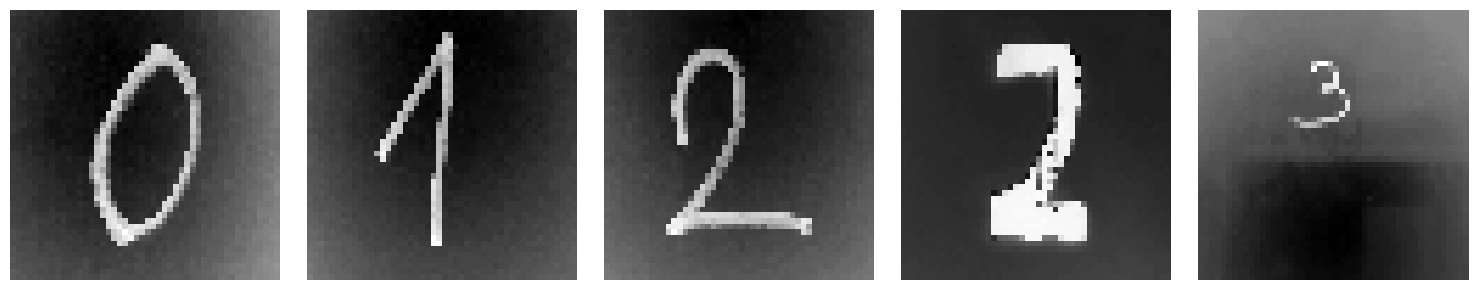

In [3]:
processed_webcam_pics = []
for image_file in os.listdir(webcam_path):
    full_path = os.path.join(webcam_path, image_file)
    processed_image = processing_img(full_path)
    processed_image = processed_image / 255.0
    processed_webcam_pics.append(processed_image)

# Plot 5 first images in the processed_webcam_pics list using the plot_web_img function
plot_web_img(processed_webcam_pics[:5])

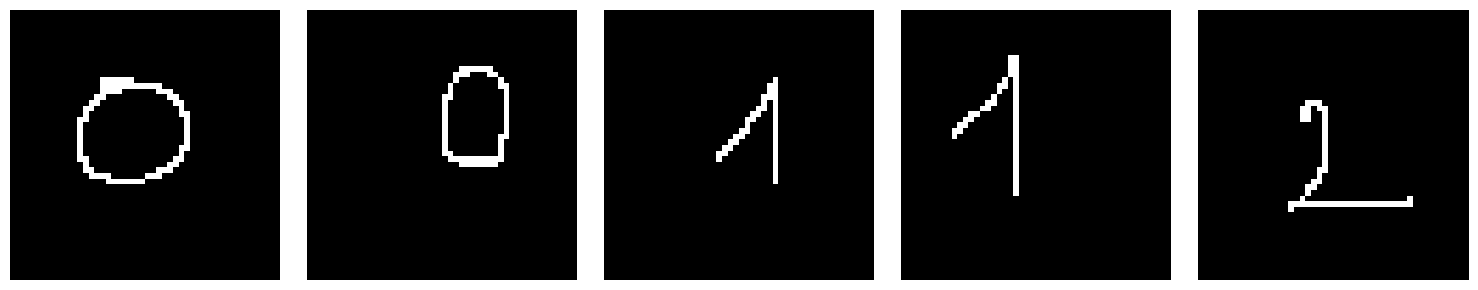

In [4]:
processed_drawing_pics = []
for image_file in os.listdir(drawing_path):
    full_path = os.path.join(drawing_path, image_file)
    processed_image = processing_img(full_path)
    _, processed_image = cv2.threshold(processed_image, 0, 255, cv2.THRESH_BINARY)
    processed_image = processed_image / 255.0
    processed_drawing_pics.append(processed_image)

# Plot 5 first images in the processed_drawing_pics list using the plot_web_img function
plot_web_img(processed_drawing_pics[:5])

In [5]:
model = load_model('training_models/number_recon_model.keras')

In [6]:
webcam_test_data = np.array(processed_webcam_pics)
drawing_test_data = np.array(processed_drawing_pics)

1/1 [==============================] - 0s 146ms/step


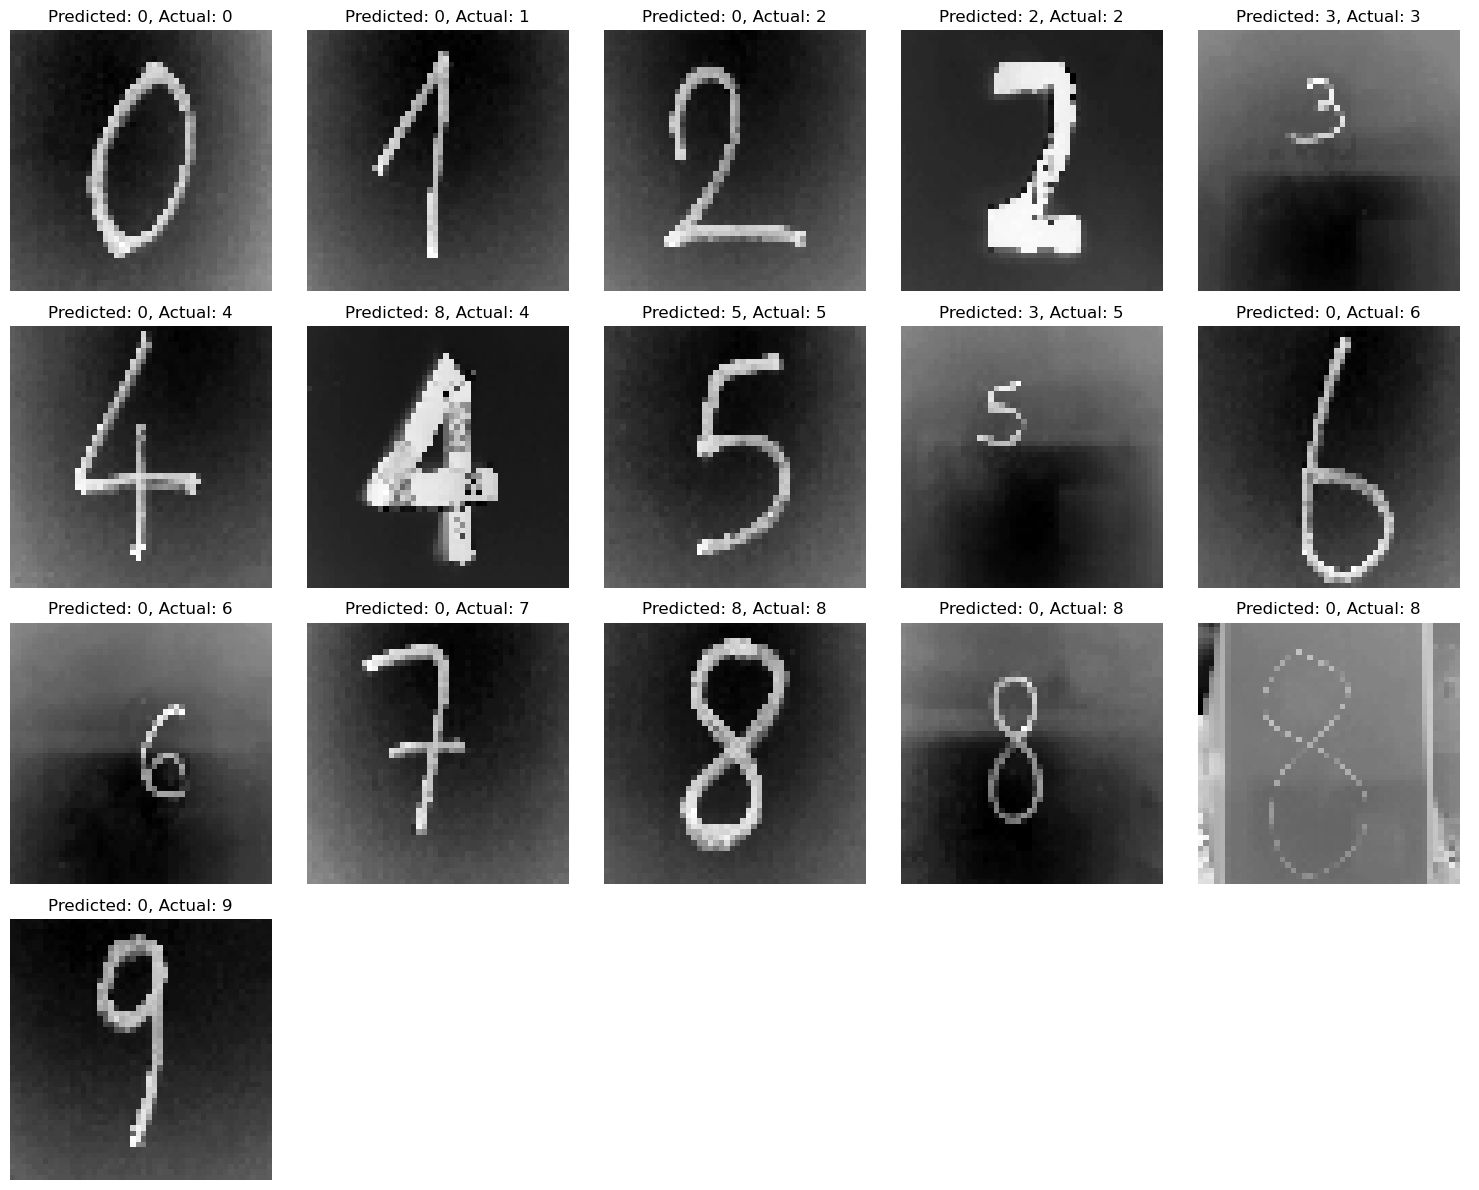

Accuracy: 31%


In [7]:
webcam_predictions = model.predict(webcam_test_data)

webcam_predicted_digits = np.argmax(webcam_predictions, axis=1)

num_images = len(webcam_test_data)
rows = int(np.ceil(num_images / 5.0))  # Use np.ceil to round up to the nearest whole number
fig, axes = plt.subplots(rows, 5, figsize=(15, rows*3))
axes = axes.ravel()  # Flatten the axes array

# Hide axes for unused subplots
for ax in axes[num_images:]:
    ax.axis('off')

for i, image in enumerate(webcam_test_data):
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Predicted: {webcam_predicted_digits[i]}")
    axes[i].set_title(f"Predicted: {webcam_predicted_digits[i]}, Actual: {webcam_actual_digits[i]}")

plt.tight_layout()
plt.show()

# Caluculate accuracy
correct = 0
for i in range(len(webcam_predicted_digits)):
    if webcam_predicted_digits[i] == int(webcam_actual_digits[i]):
        correct += 1

accuracy = correct / len(webcam_predicted_digits)

print(f"Accuracy: {accuracy:.0%}")

1/1 [==============================] - 0s 11ms/step


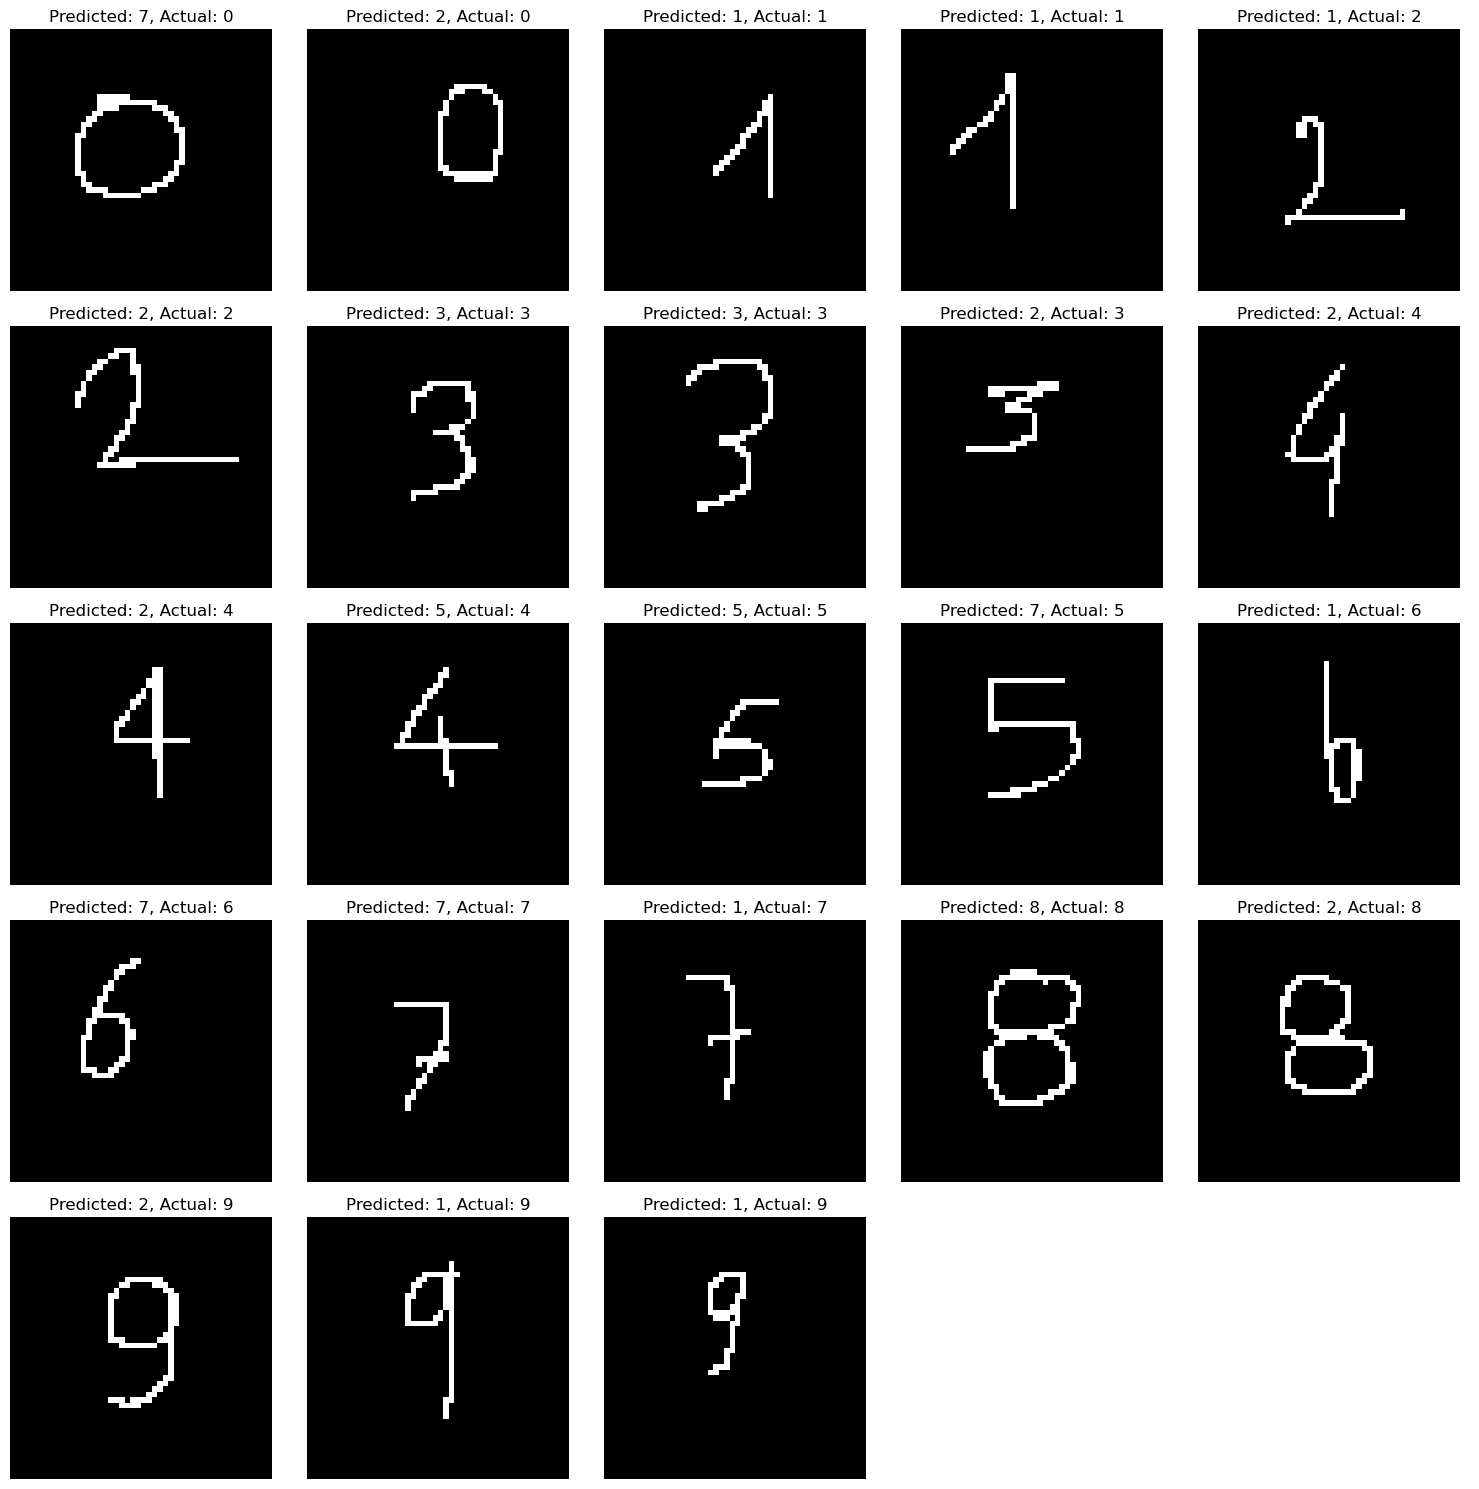

Accuracy: 35%


In [8]:
drawing_predictions = model.predict(drawing_test_data)

drawing_predicted_digits = np.argmax(drawing_predictions, axis=1)

num_images = len(drawing_test_data)
rows = int(np.ceil(num_images / 5.0))  # Use np.ceil to round up to the nearest whole number
fig, axes = plt.subplots(rows, 5, figsize=(15, rows*3))
axes = axes.ravel()  # Flatten the axes array

# Hide axes for unused subplots
for ax in axes[num_images:]:
    ax.axis('off')

for i, image in enumerate(drawing_test_data):
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Predicted: {drawing_predicted_digits[i]}")
    axes[i].set_title(f"Predicted: {drawing_predicted_digits[i]}, Actual: {drawing_actual_digits[i]}")

plt.tight_layout()
plt.show()

# Caluculate accuracy
correct = 0
for i in range(len(drawing_predicted_digits)):
    if drawing_predicted_digits[i] == int(drawing_actual_digits[i]):
        correct += 1

accuracy = correct / len(drawing_predicted_digits)

print(f"Accuracy: {accuracy:.0%}")